In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist


```
모델만들기 : weights 찾는 작업
data : X_train, X_test((훈련, train), (예측, predict))
label : y_train, y_test
1. load data(from mnist)
2. inspect data(shape, img&label)
3. data : preprocessing( /255,0 (scaling(이미지에 한해)))
4. build a model + model.compile(loss 에러를 어떻게 계산할래? = 'sparse_categorical_crossentropy', optimizer 최솟값찾아가는 최적화 = 'adam', metrix = ['accuracy'])
5. train -> model.fit(X_train, y_train, epochs = 10)
```



In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# 데이터 살펴보기
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

Text(0.5, 1.0, '5')

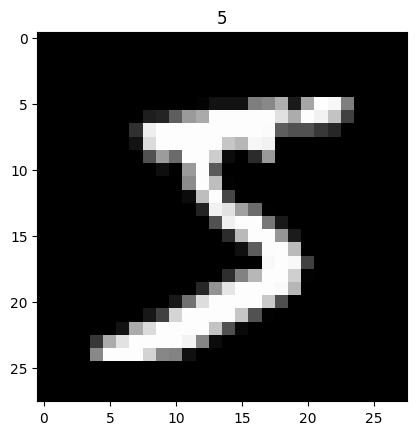

In [ ]:
# 데이터 보기
import matplotlib.pyplot as plt
#plt.imshow(X_train[0])
plt.imshow(X_train[0], cmap = 'gray')
plt.title(y_train[0])

In [ ]:
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0
print(X_train_scaled[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [ ]:
#단층모델
model1 = Sequential([
    Flatten(input_shape = (28, 28)),  #인풋
    Dense(10, activation = 'softmax') #아웃풋(0~9)
])
model1.summary()                       #모델의 외형만 만듦

#왜 7850일까. 웨이트랑 바이아스까지 7850개의 파라미터

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model1.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history1 = model1.fit(X_train_scaled, y_train, epochs = 10)  #배치사이즈 디폴트 32. 1875번을 돌리면서 loss 계산. 더 나은 w 찾아감. x_train의 경우 6만번 loss 계산

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8145 - loss: 0.7109
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9125 - loss: 0.3111
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9197 - loss: 0.2873
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9235 - loss: 0.2696
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9280 - loss: 0.2618
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9274 - loss: 0.2644
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9275 - loss: 0.2586
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9307 - loss: 0.2504
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9313 - loss: 0.2498
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9309 - loss: 0.2508


In [ ]:
#hidden layers 64 -> 32 -> 10
#3층모델
model2 =Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(64, activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(10, activation = 'softmax')
])
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,650 (205.66 KB)

 Trainable params: 52,650 (205.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model2.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history2 = model2.fit(X_train_scaled, y_train, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8508 - loss: 0.5130
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9565 - loss: 0.1451
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9707 - loss: 0.1004
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9771 - loss: 0.0793
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9782 - loss: 0.0662
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9825 - loss: 0.0542
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9854 - loss: 0.0462
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9880 - loss: 0.0385
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9890 - loss: 0.0336
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9908 - loss: 0.0277


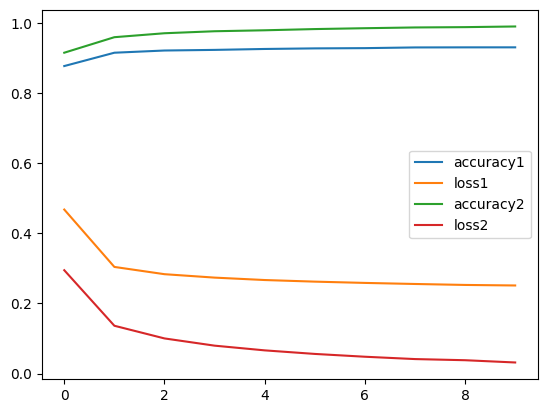

In [ ]:
acc1 = history1.history['accuracy']
loss1 = history1.history['loss']
acc2 = history2.history['accuracy']
loss2 = history2.history['loss']
plt.plot(acc1, label = 'accuracy1')
plt.plot(loss1, label = 'loss1')
plt.plot(acc2, label = 'accuracy2')
plt.plot(loss2, label = 'loss2')
plt.legend()
plt.show()

In [ ]:
predictions = model2.predict(X_test_scaled)
print(predictions[0])
#얘가 준 건 확률값, 10개의 답을 냈는데 0일 확률, 1일 확률.... 이 중에서 가장 높은 숫자에 해당하는 게 정답일 확률 -> 7
print(np.argmax(predictions[0]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[6.1649313e-10 1.3880458e-10 3.3285014e-06 6.4974097e-06 2.2113806e-12
 2.8969502e-10 2.9245782e-16 9.9998868e-01 3.1552034e-09 1.4932945e-06]
7


In [ ]:
print(y_test[0])

7


Text(0.5, 1.0, '7')

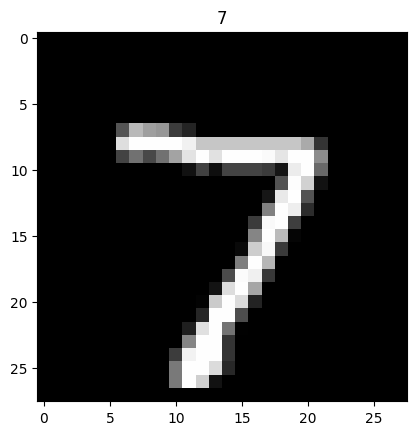

In [ ]:
plt.imshow(X_test[0], cmap = 'gray')
plt.title(y_test[0])

In [ ]:
model2.save('mnist.h5')
#구조랑 최상의 값들을 세이브

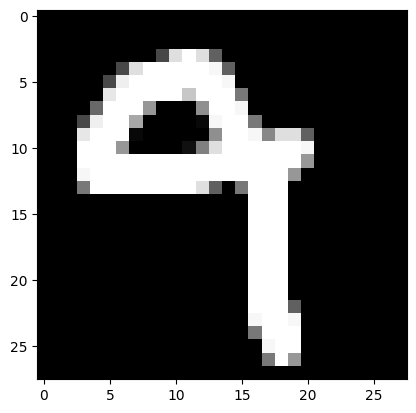

In [ ]:
#data load
my_number = plt.imread('/content/my_num.png')
plt.imshow(my_number)


In [ ]:
#shape 확인
print(my_number.shape)


(28, 28, 4)


(28, 28)


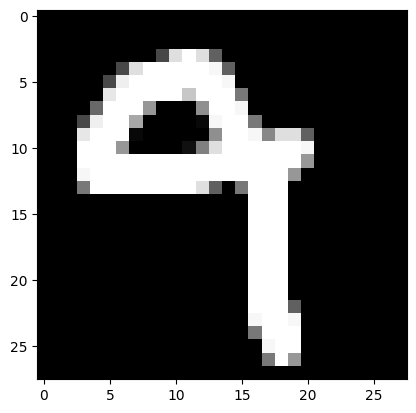

In [ ]:
#shape 조정. 2d로 만들기. data model이 학습했던 데이터와 최대한 비슷하게

import cv2
img = cv2.imread('/content/my_num.png')
img = cv2.cvtColor(my_number, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap = 'gray')
print(img.shape)

In [ ]:
#정규화
img_scaled = img/ 255.0

In [ ]:
#몇장 넣을지 알려줘야함
img_input = np.expand_dims(img_scaled, axis = 0) #차원 expend. (batch_size, image_shape)
print(img_input.shape)
#결과로 나오는 (1, 28, 28)은 28x28짜리 하나 넣겠다는 의미

(1, 28, 28)


In [ ]:
prediction = model2.predict(img_input)
print(prediction)
print(np.argmax(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[0.0225866  0.08803791 0.10272187 0.06703103 0.18119857 0.25286582
  0.06793477 0.07369771 0.10416218 0.03976354]]
5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[0.02527029 0.08842798 0.11489256 0.0580419  0.1789162  0.23925458
  0.09964822 0.05415241 0.10838003 0.03301574]]
5


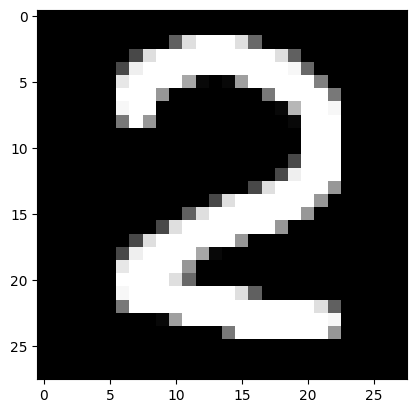

In [ ]:

img_num = cv2.imread('/content/my_num.png')
img_num = cv2.cvtColor(num, cv2.COLOR_BGR2GRAY)
plt.imshow(img_num, cmap = 'gray')

num_scaled = img_num/ 255.0

num_input = np.expand_dims(num_scaled, axis = 0)

pred = model2.predict(num_input)
print(pred)
print(np.argmax(pred))
